# Decision Trees 

In [1]:
from sklearn import tree
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Intel(R) Data Analytics Acceleration Library (Intel(R) DAAL) solvers for sklearn enabled: https://intelpython.github.io/daal4py/sklearn.html


In [2]:
data = pd.DataFrame({
    'X_1': [1, 1, 1, 0, 0, 0, 0, 1],
    'X_2': [0, 0, 0, 1, 0, 0, 0, 1],
    'Y': [1, 1, 1, 1, 0, 0, 0, 0]
})

In [3]:
data

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [4]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [5]:
x = data[['X_1', 'X_2']]
y = data.Y

In [6]:
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Resulting tree visualization:

In [7]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(x),
                     class_names = ['Positive', 'Negative'],
                     filled=True, rounded=True, special_characters=True)

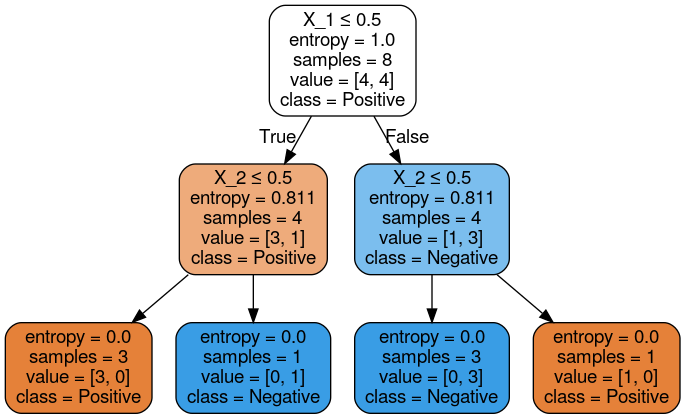

In [8]:
from IPython.display import Image
import pydotplus

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Entropy:
$$E=-\sum_{i=1}^{n} p_{i} \cdot \log_{2} p_{i}$$

In case of 4 positives and 4 negatives:
$$
E=-\frac{1}{2} \cdot \log_{2} \left( \frac{1}{2} \right) - 
\frac{1}{2} \cdot \log_{2} \left( \frac{1}{2} \right)=
\frac{1}{2}+\frac{1}{2}=1
$$

In case of only 4 negatives or only 4 positives:
$$
E=-1 \cdot \log_{2} \left( 1 \right) - 0 \cdot \log_{2} \left(0\right)=0
$$

Information gain on split:
$$
IG=E(Y)-E(Y|X)
$$  
$$
E(Y|X)=\frac{n_{1}}{N} \cdot E_{1} + \frac{n_{2}}{N} \cdot E_{2}
$$

The task on entropy:

In [9]:
e_sh1 = -(4/9)*np.log2(4/9) - (5/9)*np.log2(5/9)
e_sh2 = -1*np.log2(1) - 0
print(e_sh1, e_sh2)
e_g1 = -(4/5)*np.log2(4/5) - (1/5)*np.log2(1/5)
e_g2 = -1*np.log2(1) - 0
print(e_g1, e_g2)
e_l1 = -1*np.log2(1) - 0
e_l2 = -1*np.log2(1) - 0
print(e_l1, e_l2)
e_y = -(4/10)*np.log2(4/10) - (6/10)*np.log2(6/10)
print(e_y)
ig_sh = e_y - (9/10) * e_sh1 - (1/10) * e_sh2
ig_g = e_y - (5/10) * e_g1 - (5/10) * e_g2
ig_l = e_y - (4/10) * e_l1 - (6/10) * e_l2
print(ig_sh, ig_g, ig_l)

0.9910760598382222 -0.0
0.7219280948873623 -0.0
-0.0 -0.0
0.9709505944546686
0.07898214060026854 0.6099865470109874 0.9709505944546686


### Titanic: Machine Learning from Disaster

Data from https://www.kaggle.com/c/titanic

In [10]:
titanic_data = pd.read_csv('train.csv')

In [11]:
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [12]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
x = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic_data.Survived
x.head()

Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0       3    male  22.0      1      0   7.2500        S
1       1  female  38.0      1      0  71.2833        C
2       3  female  26.0      0      0   7.9250        S
3       1  female  35.0      1      0  53.1000        S
4       3    male  35.0      0      0   8.0500        S

In [14]:
x = pd.get_dummies(x)
x.head()

Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  Embarked_C  \
0       3  22.0      1      0   7.2500           0         1           0   
1       1  38.0      1      0  71.2833           1         0           1   
2       3  26.0      0      0   7.9250           1         0           0   
3       1  35.0      1      0  53.1000           1         0           0   
4       3  35.0      0      0   8.0500           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [15]:
x = x.fillna({'Age': x.Age.median()})

In [16]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(x, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

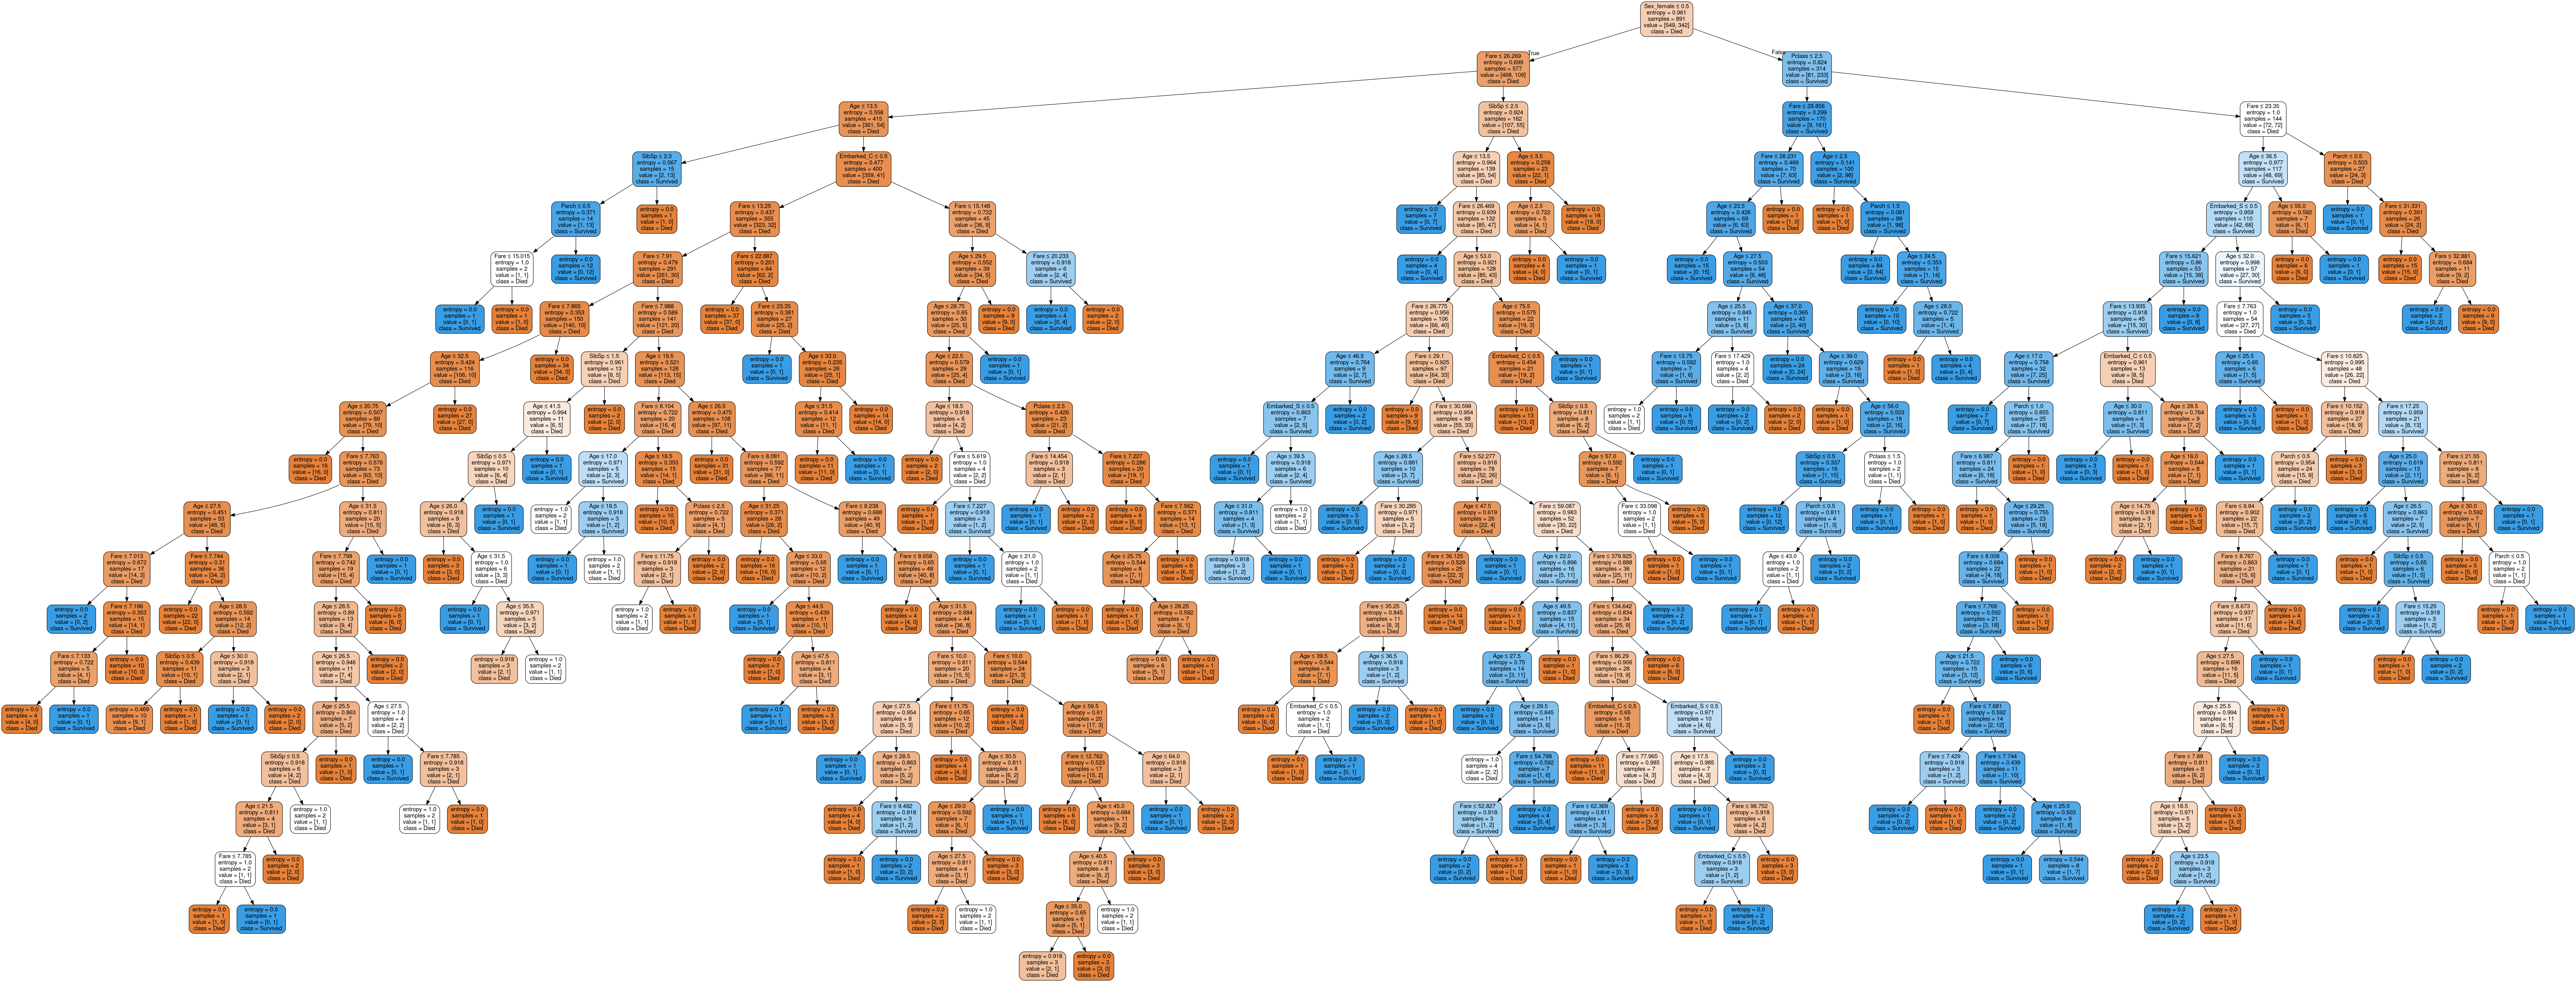

In [17]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=list(x),
                     class_names = ['Died', 'Survived'],
                     filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

Overfitting!

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [20]:
print(x_train.shape, x_test.shape)

(596, 10) (295, 10)


In [21]:
clf.score(x, y)

0.9797979797979798

In [22]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [23]:
clf.score(x_train, y_train)

0.9798657718120806

In [24]:
clf.score(x_test, y_test)

0.7661016949152543

Overfitting!

In [25]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [26]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [27]:
clf.score(x_train, y_train)

0.8406040268456376

In [28]:
clf.score(x_test, y_test)

0.8067796610169492

Now it gets better!

### Fitting, overfitting, underfitting and cross-validation

In [29]:
max_depth_values = range(1, 100)

In [30]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
    })
    scores_data = scores_data.append(temp_score_data)

In [31]:
scores_data.head()

max_depth  train_score  test_score
0          1     0.781879    0.796610
0          2     0.805369    0.776271
0          3     0.823826    0.820339
0          4     0.833893    0.823729
0          5     0.840604    0.806780

In [32]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score'],
                                    var_name='set_type', value_name='score')

In [33]:
scores_data_long.head()

max_depth     set_type     score
0          1  train_score  0.781879
1          2  train_score  0.805369
2          3  train_score  0.823826
3          4  train_score  0.833893
4          5  train_score  0.840604

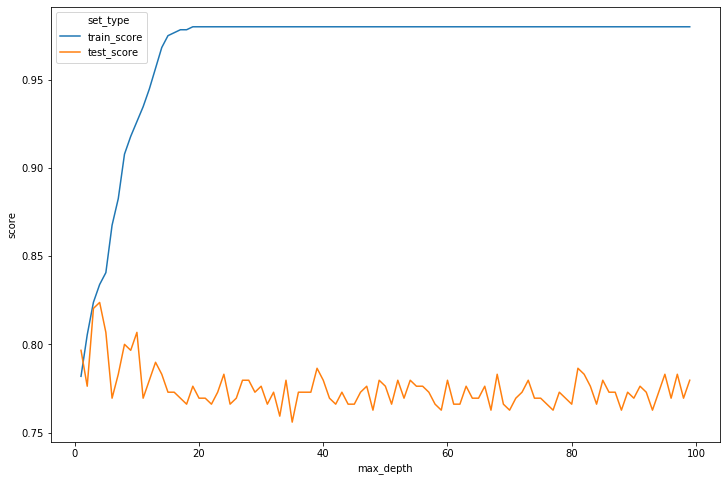

In [34]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [37]:
cross_val_score(clf, x_train, y_train, cv=5).mean()

0.7835799743626264

In [38]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(x_train, y_train)
    train_score = clf.score(x_train, y_train)
    test_score = clf.score(x_test, y_test)
    mean_cross_val_score = cross_val_score(clf, x_train, y_train, cv=5).mean()
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score],
        'cross_val_score': [mean_cross_val_score]
    })
    scores_data = scores_data.append(temp_score_data, ignore_index=True)

In [39]:
scores_data.head()

max_depth  train_score  test_score  cross_val_score
0          1     0.781879    0.796610         0.781857
1          2     0.805369    0.776271         0.768553
2          3     0.823826    0.820339         0.788678
3          4     0.833893    0.823729         0.783580
4          5     0.840604    0.810169         0.800303

In [40]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score', 'cross_val_score'],
                                    var_name='set_type', value_name='score')

In [41]:
scores_data_long.head()

max_depth     set_type     score
0          1  train_score  0.781879
1          2  train_score  0.805369
2          3  train_score  0.823826
3          4  train_score  0.833893
4          5  train_score  0.840604

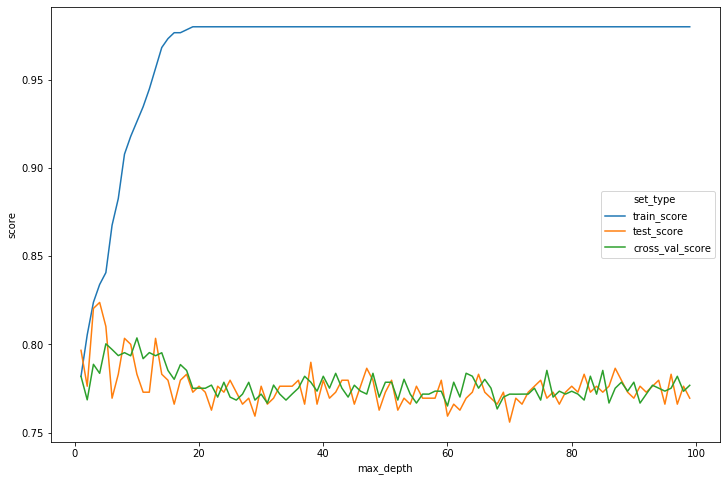

In [42]:
plt.figure(figsize=(12, 8))
sns.lineplot(x='max_depth', y='score', hue='set_type', data=scores_data_long)
plt.show()

In [43]:
optimal_depth = scores_data.iloc[scores_data.cross_val_score.idxmax()][0]
print(optimal_depth)

10.0


In [44]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=optimal_depth)

In [45]:
best_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10.0,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
best_clf.score(x_test, y_test)

0.8101694915254237

Task on iris dataset:

In [47]:
iris_train = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_iris.csv', index_col=0)
iris_test = pd.read_csv('https://stepik.org/media/attachments/course/4852/test_iris.csv', index_col=0)
print(iris_train.shape, iris_test.shape)
iris_train.head()

(100, 5) (50, 5)


sepal length  sepal width  petal length  petal width  species
130           7.4          2.8           6.1          1.9        2
7             5.0          3.4           1.5          0.2        0
11            4.8          3.4           1.6          0.2        0
142           5.8          2.7           5.1          1.9        2
109           7.2          3.6           6.1          2.5        2

In [48]:
xi_train, yi_train = iris_train.iloc[:, :4], iris_train.iloc[:, 4]
xi_test, yi_test = iris_test.iloc[:, :4], iris_test.iloc[:, 4]

In [49]:
scores_data = pd.DataFrame()

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=0)
    clf.fit(xi_train, yi_train)
    train_score = clf.score(xi_train, yi_train)
    test_score = clf.score(xi_test, yi_test)
    temp_score_data = pd.DataFrame({
        'max_depth': [max_depth],
        'train_score': [train_score],
        'test_score': [test_score]
    })
    scores_data = scores_data.append(temp_score_data, ignore_index=True)

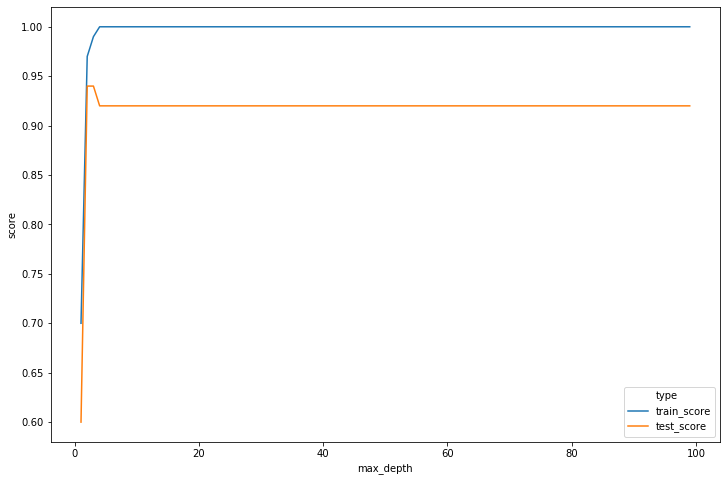

In [50]:
scores_data_long = scores_data.melt(id_vars=['max_depth'], 
                                    value_vars=['train_score', 'test_score'],
                                    var_name='type', value_name='score')
plt.figure(figsize=(12, 8))
sns.lineplot(x='max_depth', y='score', hue='type', data=scores_data_long)
plt.show()

Task on dogs and cats dataset:

In [51]:
dnc = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')
print(dnc.shape)
dnc.head()

(1000, 6)


Длина  Высота  Шерстист  Гавкает  Лазает по деревьям      Вид
0     15    18.0         1        1                   0  собачка
1     20    24.0         1        0                   0  собачка
2     34    40.8         1        1                   0  собачка
3     26    31.2         1        1                   0  собачка
4     16    19.2         1        1                   0  собачка

In [52]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(dnc.iloc[:, :5], dnc.iloc[:, 5])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [53]:
clf.score(dnc.iloc[:, :5], dnc.iloc[:, 5])

1.0

In [54]:
dnc_test = pd.read_json('dataset_209691_15.txt')

In [55]:
dnc_test.head()

Длина  Высота  Шерстист  Гавкает  Лазает по деревьям
0     27    32.4         1        1                   0
1     17    20.4         1        1                   0
2     17    20.4         1        1                   0
3     21    25.2         1        1                   0
4     32    38.4         1        1                   0

In [56]:
yd_test = clf.predict(dnc_test)

In [57]:
np.unique(yd_test, return_counts=True)

(array(['котик', 'собачка'], dtype=object), array([46, 54]))

### Accuracy Metrics

$$
Precision = \frac{TP}{TP+FP}
$$  
$$
Recall = \frac{TP}{TP+FN}
$$  
$$
F-measure=2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}
$$

In [58]:
from sklearn.metrics import precision_score

Task on songs dataset:

In [59]:
sadf = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')
sadf.head()

song  year          artist    genre  \
0            the-ownerz  2007       gangstarr  Hip-Hop   
1  dead-sound-of-misery  2006  blind-guardian    Metal   
2         modred-s-song  2006  blind-guardian    Metal   
3        the-ninth-wave  2015  blind-guardian    Metal   
4                skills  2014       gangstarr  Hip-Hop   

                                              lyrics  length  commas  \
0  "One-two.."\n"One-two, shots to the chin.. kno...    1300      24   
1  It's dark\nLet's do it now\nBring in the siren...    1566       0   
2  I've lost my battle before it starts\nmy first...     996       1   
3  As dark night embraces\nWe are the nation\nI w...    2868       5   
4  Skills, skills, skills\n"My Microphone"\n"It's...    3351      22   

   exclamations  colons  hyphens  
0             5       0       11  
1             0       0        0  
2             0       1        0  
3             0       0        0  
4             0       0        3

In [60]:
xs_train, xs_test, ys_train, ys_test = train_test_split(
    sadf[['length', 'commas', 'exclamations', 'colons','hyphens']],
    sadf.artist,
    test_size=0.33
)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=5)
clf.fit(xs_train, ys_train)
predictions = clf.predict(xs_test)
precision_score(y_true=ys_test, y_pred=predictions, average='micro')

0.7394957983193278

### ROC Curve

In [61]:
from sklearn.model_selection import GridSearchCV

Grid-search using 5-fold cross-validation:

In [62]:
grid_search_cv_clf = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(),
    param_grid={'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)},
    cv=5
)

In [63]:
grid_search_cv_clf.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)},
             pre_dispatc

In [64]:
grid_search_cv_clf.best_params_

{'criterion': 'gini', 'max_depth': 7}

Now we have the best estimator:

In [65]:
best_clf = grid_search_cv_clf.best_estimator_

In [66]:
best_clf.score(x_test, y_test)

0.8101694915254237

In [67]:
from sklearn.metrics import precision_score, recall_score

In [68]:
precision_score(y_test, best_clf.predict(x_test))

0.82

In [69]:
recall_score(y_test, best_clf.predict(x_test))

0.6833333333333333

In [70]:
y_predicted_prob = best_clf.predict_proba(x_test)

In [71]:
y_predicted_prob[:5, :]

array([[0.87, 0.13],
       [0.87, 0.13],
       [0.87, 0.13],
       [0.  , 1.  ],
       [0.  , 1.  ]])

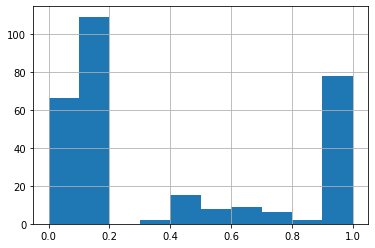

In [72]:
pd.Series(y_predicted_prob[:, 1]).hist()

In [73]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.9, 1, 0)

In [74]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8333333333333334
0.5416666666666666


In [75]:
y_pred = np.where(y_predicted_prob[:, 1] > 0.1, 1, 0)

In [76]:
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.462882096069869
0.8833333333333333


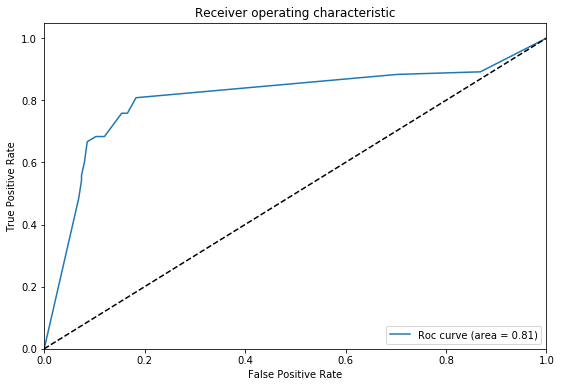

In [77]:
from sklearn.metrics import roc_curve, auc
from sklearn.datasets import make_classification

fpr, tpr, thresholds = roc_curve(y_test, y_predicted_prob[:, 1])
roc_auc = auc(fpr, tpr)  # compute area under the curve

plt.figure(figsize=(9, 6))
plt.plot(fpr, tpr, label=f'Roc curve (area = {roc_auc:.2})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

$$
Sensitivity = True\ Positive\ Rate = \frac{TP}{TP + FN} = Recall
$$  
$$
Specificity = True\ Negative\ Rate = \frac{TN}{TN + FP}
$$  
$$
False\ Positive\ Rate = 1 - Specificity = \frac{FP}{FP + TN}
$$

### Practice

Building classifier:

In [78]:
dt = tree.DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [79]:
exn = pd.read_csv('https://stepik.org/media/attachments/course/4852/train_data_tree.csv')
print(exn.shape)
exn.head()

(238, 3)


sex  exang  num
0    1      1    1
1    1      1    1
2    1      0    1
3    1      0    0
4    1      0    1

Calculating information gain on the first split:

In [80]:
dt = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [81]:
dt.fit(exn[['sex', 'exang']], exn['num'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [82]:
e = dt.tree_.impurity  # entropy of each node
n = dt.tree_.n_node_samples  # number of samples in each node
ig = e[0] - n[1] * e[1] / n[0] - n[2] * e[2] / n[0]
print(round(ig, 3))

0.119


1. Decision trees can solve classification task with arbitrary number of classes
2. Both categorial and numerical features can be used for fitting decision tree
3. The deeper is tree, the higher is risk to overfit

Fitting the tree on iris dataset:

In [83]:
from sklearn.datasets import load_iris

In [84]:
iris = load_iris()
x, y = iris.data, iris.target

xi_train, xi_test, yi_train, yi_test = train_test_split(x, y, test_size=0.25)
dt = tree.DecisionTreeClassifier()
dt.fit(xi_train, yi_train)
predicted = dt.predict(xi_test)

Grid search:

In [85]:
search = GridSearchCV(
    estimator=tree.DecisionTreeClassifier(),
    param_grid={
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11)
    },
    cv=5
)
search.fit(x, y)
best_tree = search.best_estimator_

Randomized search (it's faster than grid one due to sampling of parameters):

In [87]:
from sklearn.model_selection import RandomizedSearchCV

search = RandomizedSearchCV(
    estimator=tree.DecisionTreeClassifier(),
    param_distributions={
        'max_depth': range(1, 11),
        'min_samples_split': range(2, 11),
        'min_samples_leaf': range(1, 11)
    },
    cv=5
)
search.fit(x, y)
best_tree = search.best_estimator_